In [28]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt

import numpy as np


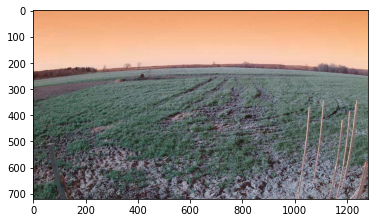

In [29]:
# image_path = "/home/arnold/raindrop-detection-cnn/20161021T144502_BATA.jpg" 
# rawImage = cv2.imread(image_path)
# plt.imshow(rawImage)
# plt.show()
#clear image 
image_path = '/home/arnold/raindrop-detection-cnn/mesonet/20160420T221001_DELE.jpg'
rawImage = cv2.imread(image_path)
plt.imshow(rawImage)
plt.show()

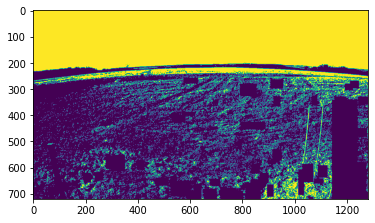

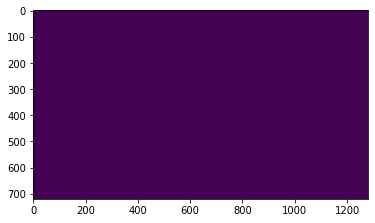

In [30]:
#min white color
hsv = cv2.cvtColor(rawImage, cv2.COLOR_BGR2HSV)

# img = cv2.resize(rawImage,(400,500))
gray = cv2.cvtColor(rawImage,cv2.COLOR_BGR2GRAY)

# plt.imshow(hsv)
# plt.show()
# plt.imshow(gray)
# plt.show()

ret,gray = cv2.threshold(gray,127,255,0)
gray2 = gray.copy()
mask = np.zeros(gray.shape,np.uint8)

contours, hier = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
for cnt in contours:
    if 200<cv2.contourArea(cnt)<5000:
        (x,y,w,h) = cv2.boundingRect(cnt)
        cv2.rectangle(gray2,(x,y),(x+w,y+h),0,-1)

cv2.bitwise_not(gray2,gray2,mask)

plt.imshow(gray2)
plt.show()

lower_white = np.array([0,3,240])
higher_white = np.array([255,5,255])
# getting the range of blue color in frame
white_range = cv2.inRange(rawImage, lower_white, higher_white)
# cv2.imshow("White", white_range);cv2.waitKey(0);
plt.imshow(white_range)
plt.show()

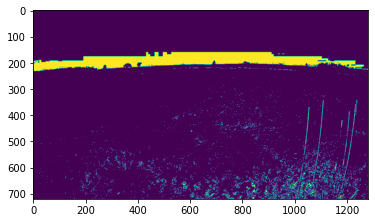

In [31]:
#large white color
hsv = cv2.cvtColor(rawImage, cv2.COLOR_BGR2HSV)
lower_white = np.array([0,0,180])
higher_white = np.array([255,255,255])
white_range = cv2.inRange(rawImage, lower_white, higher_white)

# cv2.imshow("White", white_range);cv2.waitKey(0);
plt.imshow(white_range)
plt.show()

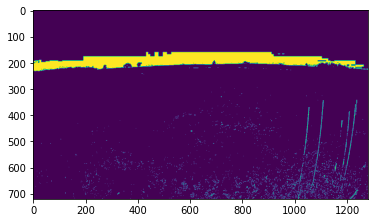

In [32]:
#filter on bgr color space
lower_white = (180,180,180)
higher_white = (255,255,255)
white_range = cv2.inRange(rawImage, lower_white, higher_white)
plt.imshow(white_range)
plt.show()